## Seed Data (Classification and Clustering Analysis)

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading file "Seed_Data.csv" and show the head of the file.
df =pd.read_csv('Seed_Data.csv')
df = df.sample(frac=0.5, random_state=3)
df.head()    # Quick checking the dataframe

,A,P,C,LK,WK,A_Coef,LKG,target
164,11.14,12.79,0.8558,5.011,2.794,6.388,5.049,2
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,1
122,16.17,15.38,0.8588,5.762,3.387,4.286,5.703,1
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,2
128,20.16,17.03,0.8735,6.513,3.773,1.910,6.185,1


In [3]:
#Checking the data type of each attribute and if any missing value in each feature:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 164 to 65
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       105 non-null    float64
 1   P       105 non-null    float64
 2   C       105 non-null    float64
 3   LK      105 non-null    float64
 4   WK      105 non-null    float64
 5   A_Coef  105 non-null    float64
 6   LKG     105 non-null    float64
 7   target  105 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 7.4 KB


In [4]:
df=df.sample(frac=1,random_state=3)
y=df['target']
x=df.drop('target',axis=1)

In [5]:
df['target'].value_counts()

1    38
0    36
2    31
Name: target, dtype: int64

# Data Exploration/Analysis

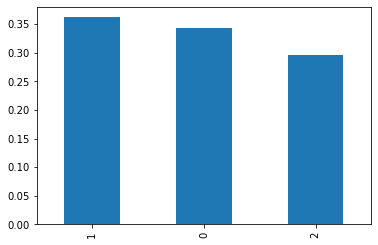

In [6]:
df['target'].value_counts(normalize=True).plot.bar();

In [7]:
#Every attribute median and max values of all features
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,14.974286,14.596857,0.873644,5.636800,3.278933,3.578116,5.421095,0.952381
std,2.988076,1.357379,0.022177,0.466863,0.378172,1.505428,0.511804,0.801212
min,10.590000,12.410000,0.809900,4.899000,2.630000,0.765100,4.607000,0.000000
25%,12.460000,13.380000,0.862500,5.224000,2.967000,2.270000,5.046000,0.000000
50%,14.920000,14.520000,0.877900,5.563000,3.312000,3.600000,5.219000,1.000000
75%,17.260000,15.730000,0.888300,6.017000,3.562000,4.677000,5.879000,2.000000
max,20.970000,17.250000,0.910800,6.675000,4.032000,8.315000,6.550000,2.000000


## Analyzing the models' result

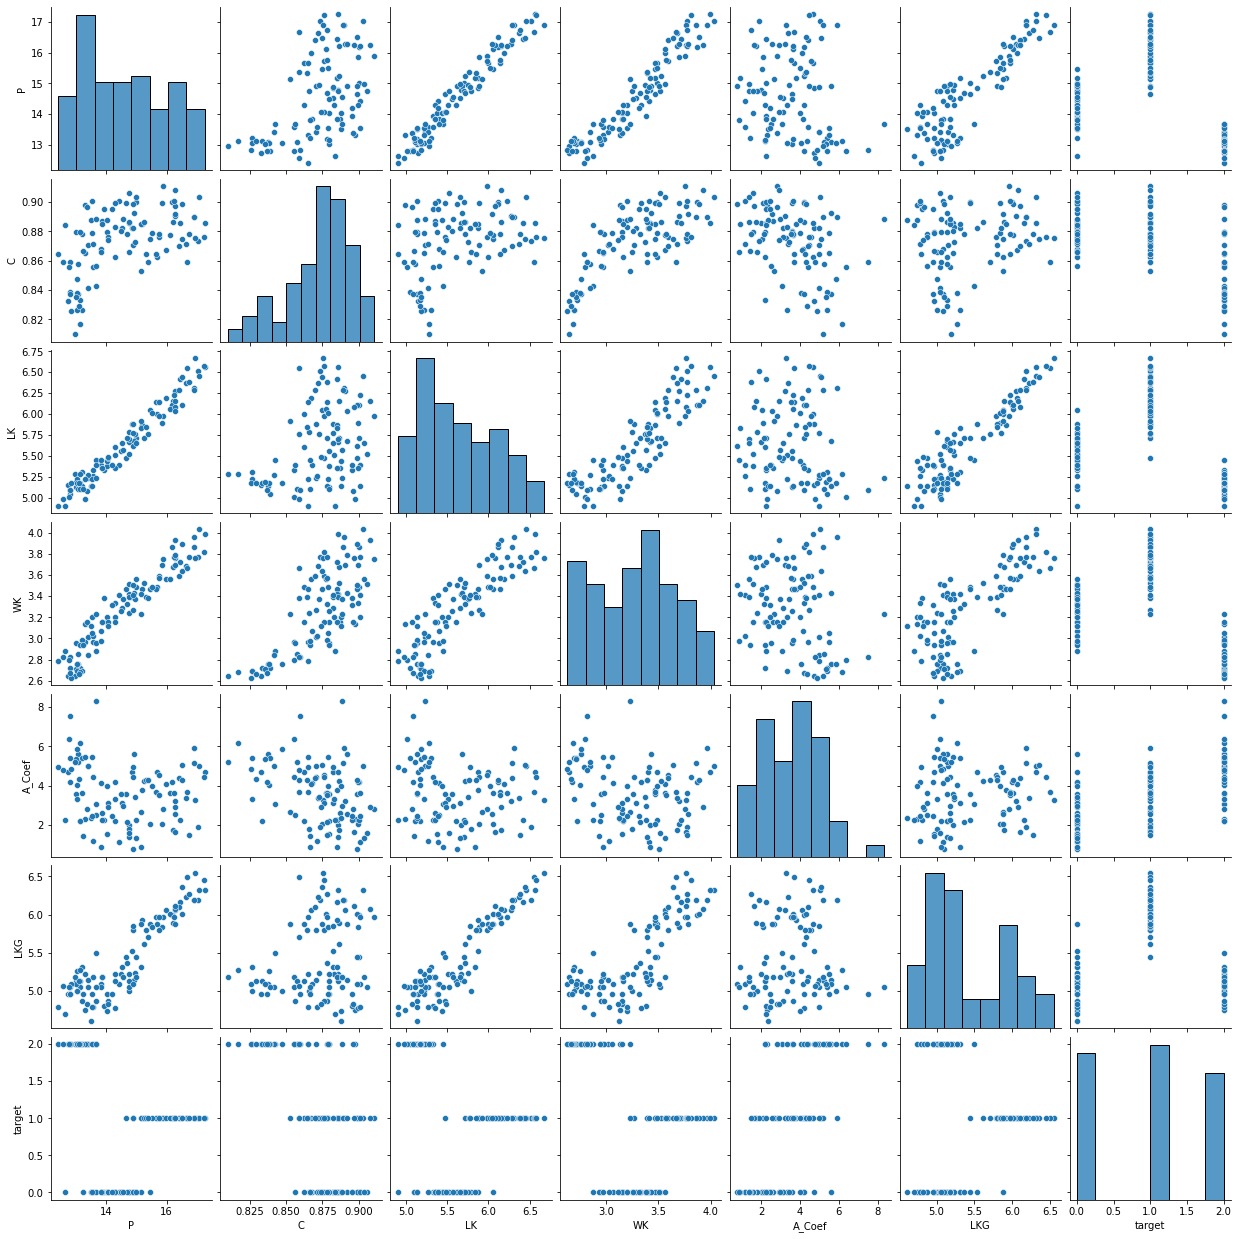

In [40]:
sns.pairplot(df);

# Data preprocessing
### Heat Map

(8.0, 0.0)

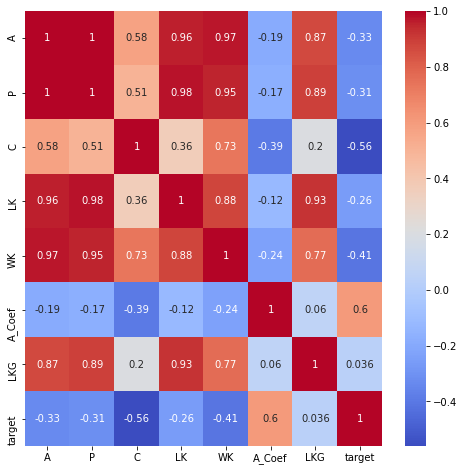

In [9]:
plt.figure(figsize=(8,8))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.ylim(8,0)

In [10]:
#Splitting independent and dependent variables
X=df.drop('A',axis=1,inplace=True)

In [11]:
a=df.groupby('target').count()
a

,P,C,LK,WK,A_Coef,LKG
target,,,,,,
0,36,36,36,36,36,36
1,38,38,38,38,38,38
2,31,31,31,31,31,31


## Building predictive algorithm using random forest

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(x)

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(X_trains,y_train)
y_train_pred =rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
#print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

Confusion Matrix - Train: 
 [[22  0  0]
 [ 0 30  0]
 [ 0  0 21]]


Overall Accuracy - Train:  1.0


Confusion Matrix - Test: 
 [[11  1  2]
 [ 0  8  0]
 [ 1  0  9]]


Overall Accuracy - Test:  0.875


## Naivem Bayes

* Naive Bayes is a simplification of Bayes’ theorem which is used as a classification algorithm for binary of multi-class problems.

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_trains,y_train)

GaussianNB()

In [16]:
y_train_pred = gnb.predict(X_trains)
y_train_prob = gnb.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))


y_test_pred = gnb.predict(X_tests)
y_test_prob = gnb.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

Confusion Matrix - Train: 
 [[21  0  1]
 [ 1 29  0]
 [ 2  0 19]]


Overall Accuracy - Train:  0.9452054794520548


Confusion Matrix - Test: 
 [[12  1  1]
 [ 0  8  0]
 [ 0  0 10]]


Overall Accuracy - Test:  0.9375


# KNN
* K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,20),'p':sp_randint(1,5)}

rsearch_knn=RandomizedSearchCV(knn,param_distributions=params,cv=3,n_iter=50,return_train_score=True,random_state=3,n_jobs=-1)
rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A9F45CCD0>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A9F45CFD0>},
                   random_state=3, return_train_score=True)

In [18]:
rsearch_knn.best_params_

{'n_neighbors': 11, 'p': 4}

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve


knn=KNeighborsClassifier(**rsearch_knn.best_params_)

# done above
knn.fit(X_trains,y_train)
y_train_pred = knn.predict(X_trains)
y_train_prob = knn.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
#print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification Report-Test: \n', classification_report(y_test,y_test_pred))
#print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

Confusion Matrix - Train: 
 [[21  1  0]
 [ 1 29  0]
 [ 4  0 17]]


Overall Accuracy - Train:  0.9178082191780822


Confusion Matrix - Test: 
 [[13  1  0]
 [ 0  8  0]
 [ 1  0  9]]


Overall Accuracy - Test:  0.9375
Classification Report-Test: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



# Clustering 

* Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and features, while data points in different groups should have highly dissimilar properties and features

In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters = 3)

In [22]:
from scipy.stats import zscore
df_scaled = df.apply(zscore)

In [23]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(df_scaled)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( {"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,735.000000
1,2,406.455317
2,3,210.416286
3,4,181.025312
4,5,152.551375
5,6,136.549486
6,7,120.435729
7,8,105.066596
8,9,92.886417


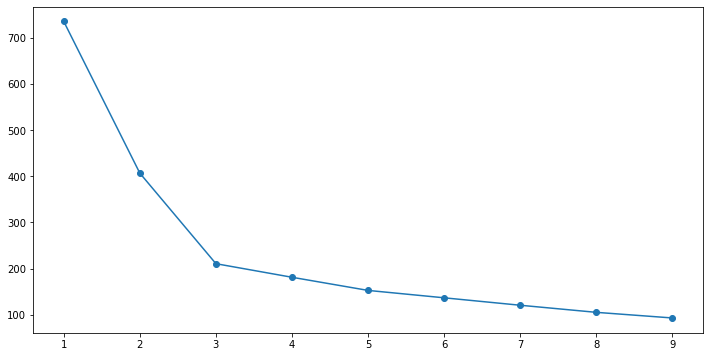

In [24]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker= "o")

In [25]:
kmeans = KMeans(n_clusters=3, n_init=15,random_state=3)

In [26]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=3)

In [27]:
centroids=kmeans.cluster_centers_

In [28]:
pd.DataFrame(centroids,columns=df.columns)

,P,C,LK,WK,A_Coef,LKG,target
0,-0.275851,0.509887,-0.370489,-0.066597,-0.710626,-0.724882,-1.029363
1,1.128282,0.353571,1.133127,1.005216,0.045221,1.217076,0.026716
2,-1.116979,-1.131427,-0.999318,-1.229915,0.871910,-0.644943,1.313813


In [29]:
df_scaled['Class']= kmeans.labels_.astype('object')

In [30]:
df_scaled['Class'].value_counts()

1    38
0    38
2    29
Name: Class, dtype: int64

In [31]:
df_k=df_scaled.copy()
df_k.head()

,P,C,LK,WK,A_Coef,LKG,target,Class
201,-0.945190,1.089960,-1.404976,-0.382429,-0.853077,-1.327340,1.313813,0
58,0.128169,0.546253,0.054236,0.372155,-1.053979,-0.390872,-1.194376,0
101,0.935038,1.157924,0.544945,1.102826,-1.007925,0.816522,0.059719,1
35,0.298425,1.194171,0.155391,0.547516,-0.873101,0.043004,-1.194376,0
71,0.794391,-0.513976,0.777386,0.544859,0.732114,0.895052,0.059719,1


In [32]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

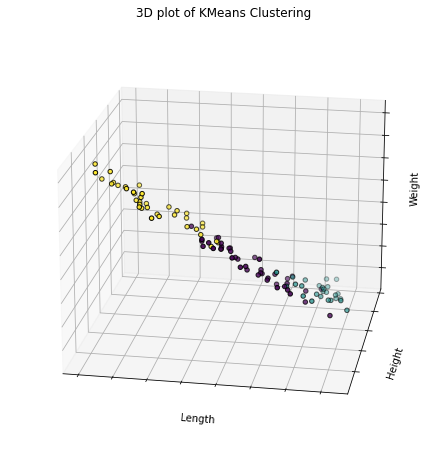

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

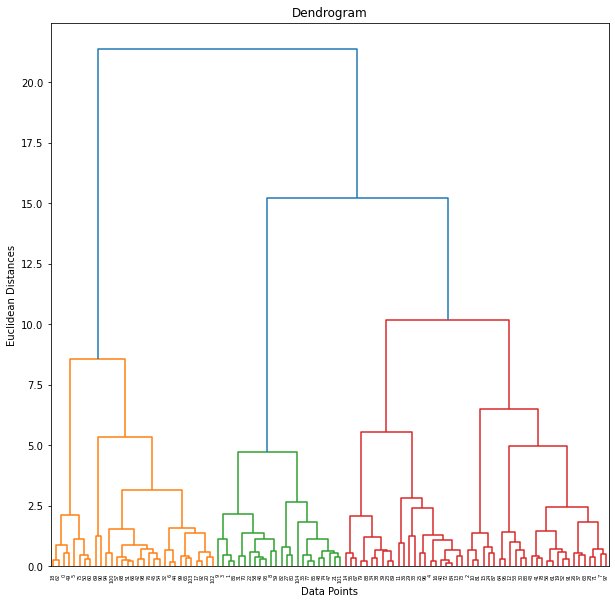

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

In [36]:
df_h

,P,C,LK,WK,A_Coef,LKG,target,label
201,13.32,0.8977,4.984,3.135,2.300,4.745,2,1
58,14.77,0.8857,5.662,3.419,1.999,5.222,0,2
101,15.86,0.8992,5.890,3.694,2.068,5.837,1,0
35,15.00,0.9000,5.709,3.485,2.270,5.443,0,2
71,15.67,0.8623,5.998,3.484,4.675,5.877,1,0
...,...,...,...,...,...,...,...,...
164,12.79,0.8558,5.011,2.794,6.388,5.049,2,1
5,14.21,0.8951,5.386,3.312,2.462,4.956,0,2
175,12.57,0.8590,4.981,2.821,4.773,5.063,2,1
168,13.12,0.8291,5.176,2.668,4.337,5.132,2,1


In [37]:
print('K-Means Predicted Data Classes:')
print(df_k['Class'].value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h['label'].value_counts())

K-Means Predicted Data Classes:
1    38
0    38
2    29
Name: Class, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    50
1    31
2    24
Name: label, dtype: int64


C:\Users\Ghost\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Ghost\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


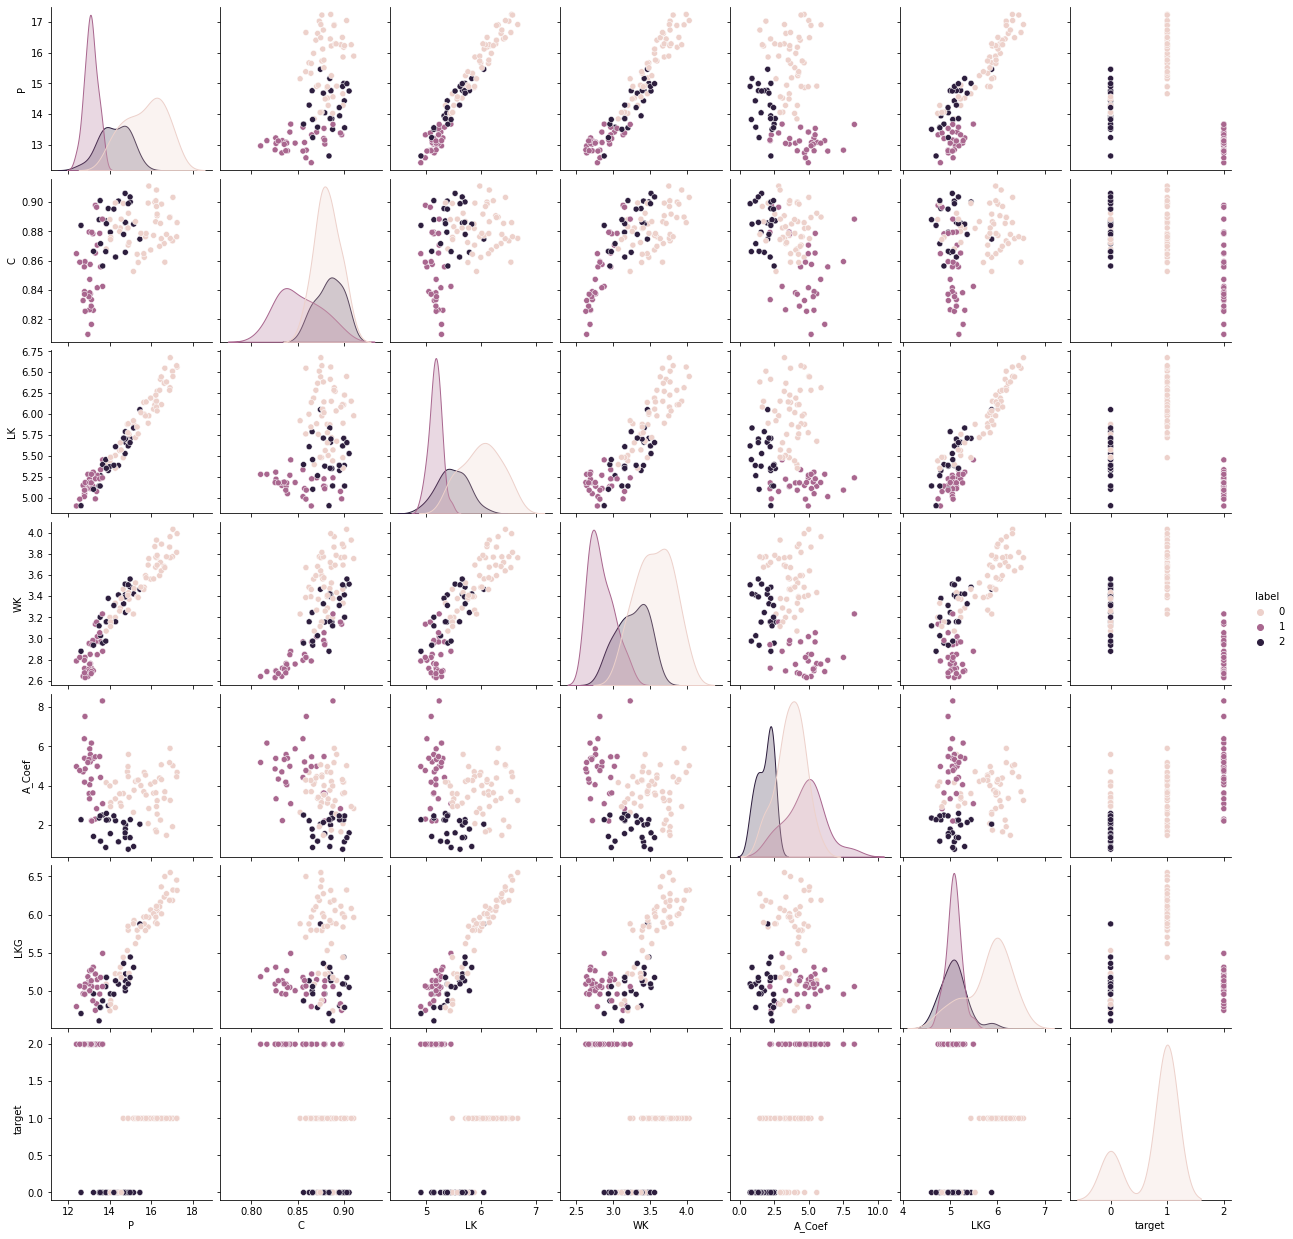

In [38]:
sns.pairplot(df_h,hue='label')

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3591843428898003


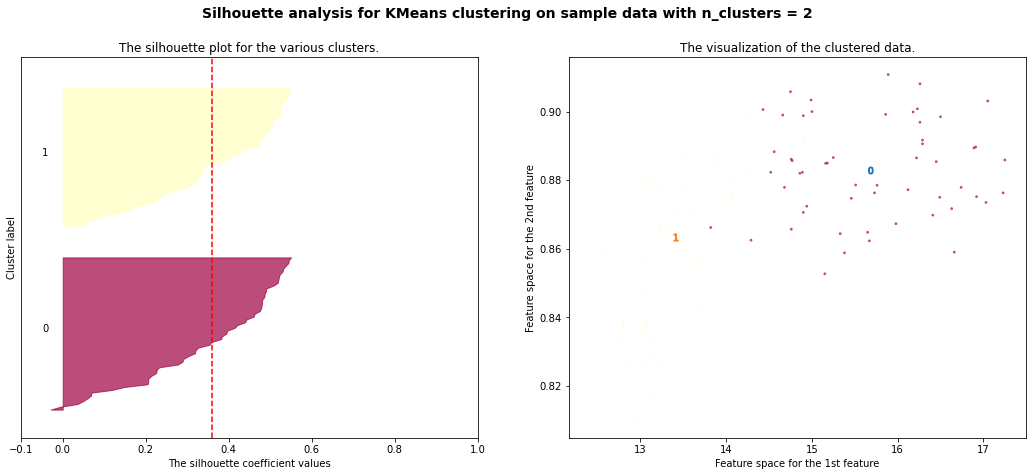

For n_clusters = 3 The average silhouette_score is : 0.4544383409924062


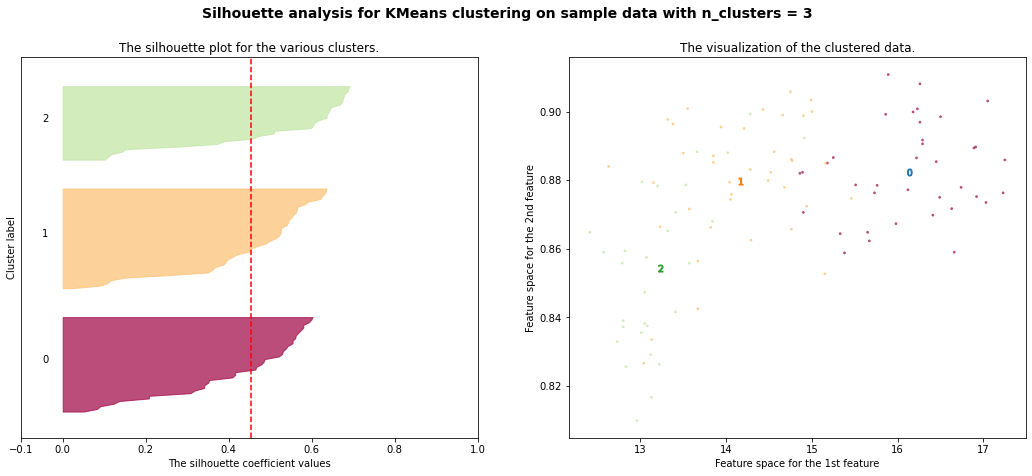

For n_clusters = 4 The average silhouette_score is : 0.4153120027719308


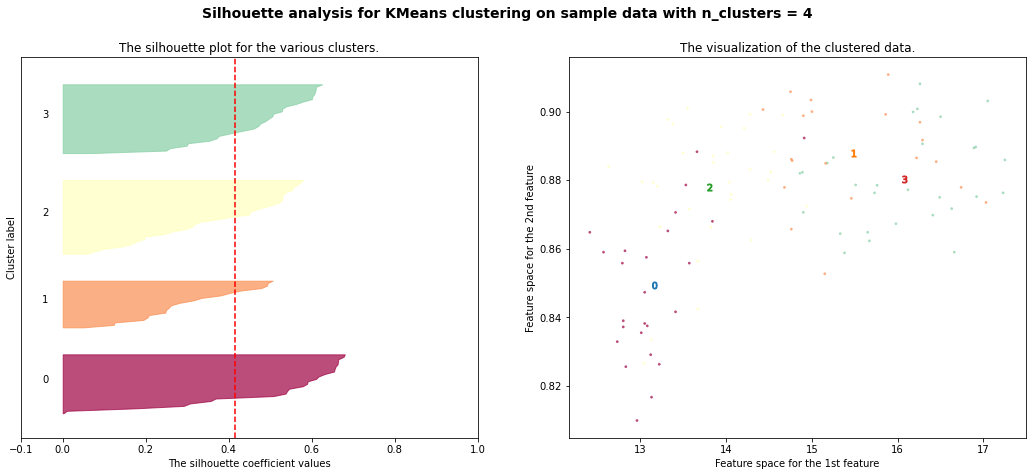

For n_clusters = 5 The average silhouette_score is : 0.3838509264644604


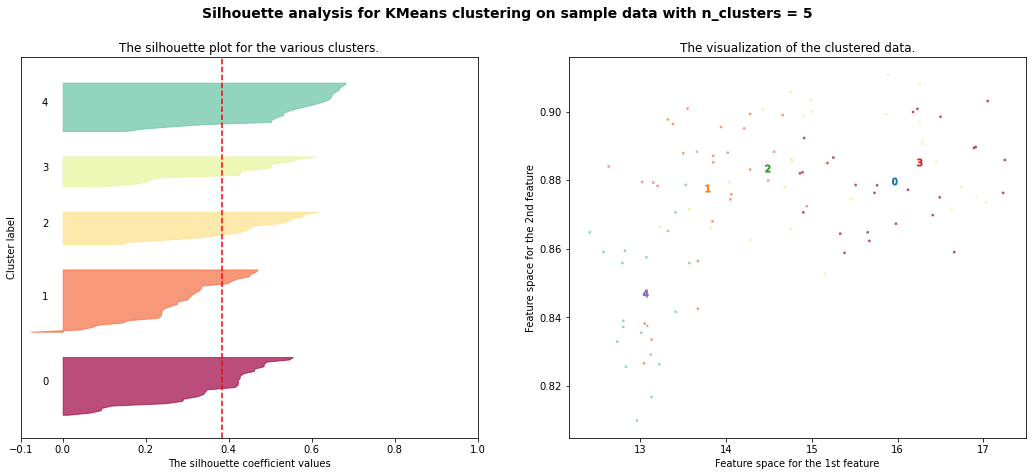

For n_clusters = 6 The average silhouette_score is : 0.38485265005738384


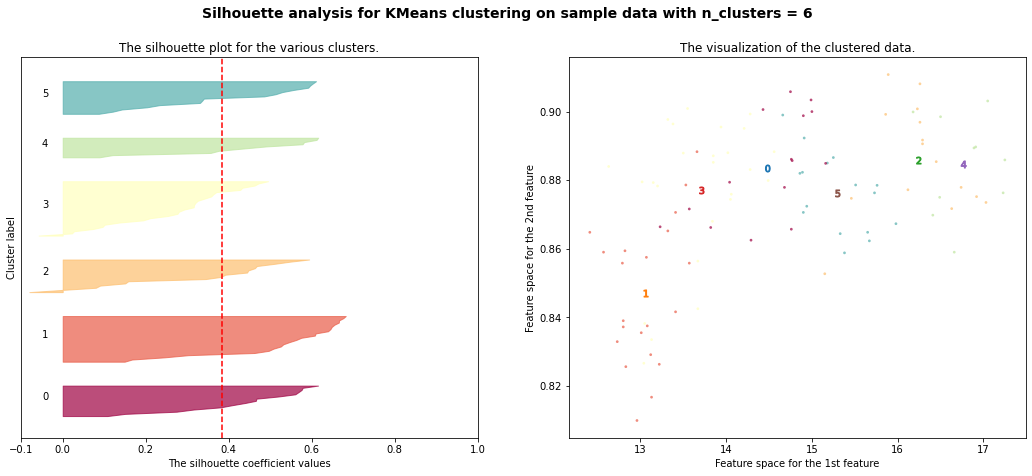

In [42]:
from __future__ import print_function
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=np.array(df.drop('target',axis=1))
y=np.array(df['target'])

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()